In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
pd.options.mode.chained_assignment= None  # default='warn'


## Leitura e visualização de dados

In [5]:
brasileirao = pd.read_csv("C:/Users/Vinicius307/Downloads/Winpython64-3.11.5.0/WPy64-31150/Brasileirao_Matches.csv")
brasileirao.head(10)

,datetime,home_team,home_team_state,away_team,away_team_state,home_goal,away_goal,season,round
0,2012-05-19 18:30:00,Palmeiras-SP,SP,Portuguesa-SP,SP,1.0,1.0,2012,1
1,2012-05-19 18:30:00,Sport-PE,PE,Flamengo-RJ,RJ,1.0,1.0,2012,1
2,2012-05-19 21:00:00,Figueirense-SC,SC,Nautico-PE,PE,2.0,1.0,2012,1
3,2012-05-20 16:00:00,Ponte Preta-SP,SP,Atletico-MG,MG,0.0,1.0,2012,1
4,2012-05-20 16:00:00,Corinthians-SP,SP,Fluminense-RJ,RJ,0.0,1.0,2012,1
5,2012-05-20 16:00:00,Botafogo-RJ,RJ,Sao Paulo-SP,SP,4.0,2.0,2012,1
6,2012-05-20 16:00:00,Internacional-RS,RS,Coritiba-PR,PR,2.0,0.0,2012,1
7,2012-05-20 18:30:00,Vasco da Gama-RJ,RJ,Gremio-RS,RS,2.0,1.0,2012,1
8,2012-05-20 18:30:00,Bahia-BA,BA,Santos-SP,SP,0.0,0.0,2012,1
9,2012-05-20 18:30:00,Cruzeiro-MG,MG,Atletico-GO,GO,0.0,0.0,2012,1


In [6]:
brasileirao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4170 entries, 0 to 4169
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   datetime         4120 non-null   object 
 1   home_team        4170 non-null   object 
 2   home_team_state  4170 non-null   object 
 3   away_team        4170 non-null   object 
 4   away_team_state  4170 non-null   object 
 5   home_goal        4059 non-null   float64
 6   away_goal        4059 non-null   float64
 7   season           4170 non-null   int64  
 8   round            4170 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 293.3+ KB


## Excluindo colunas desnecessárias
#### Irei excluir as colunas referentes aos estados dos times, pois essa informação já consta na coluna 'nome_team'

In [7]:
brasileirao.drop(columns=['home_team_state', 'away_team_state' ], inplace=True)

In [8]:
brasileirao.head()

,datetime,home_team,away_team,home_goal,away_goal,season,round
0,2012-05-19 18:30:00,Palmeiras-SP,Portuguesa-SP,1.0,1.0,2012,1
1,2012-05-19 18:30:00,Sport-PE,Flamengo-RJ,1.0,1.0,2012,1
2,2012-05-19 21:00:00,Figueirense-SC,Nautico-PE,2.0,1.0,2012,1
3,2012-05-20 16:00:00,Ponte Preta-SP,Atletico-MG,0.0,1.0,2012,1
4,2012-05-20 16:00:00,Corinthians-SP,Fluminense-RJ,0.0,1.0,2012,1


# Renomeação das colunas
#### Irei renomear todas as colunas, traduzindo do inglês para o português


In [10]:
brasileirao = brasileirao.rename(columns={'datetime':'data_jogo',
                            "home_team":'time_casa',
                           "away_team":'time_fora',
                           'home_goal':'gols_casa',
                           "away_goal": 'gols_fora',
                           'season':'temporada',
                           'round':'rodada'})

# Tratando valores not a number(NaN)

In [11]:
brasileirao.isna().sum()


data_jogo     50
time_casa      0
time_fora      0
gols_casa    111
gols_fora    111
temporada      0
rodada         0
dtype: int64

In [12]:
brasileirao.fillna(99, inplace=True)
brasileirao


,data_jogo,time_casa,time_fora,gols_casa,gols_fora,temporada,rodada
0,2012-05-19 18:30:00,Palmeiras-SP,Portuguesa-SP,1.0,1.0,2012,1
1,2012-05-19 18:30:00,Sport-PE,Flamengo-RJ,1.0,1.0,2012,1
2,2012-05-19 21:00:00,Figueirense-SC,Nautico-PE,2.0,1.0,2012,1
3,2012-05-20 16:00:00,Ponte Preta-SP,Atletico-MG,0.0,1.0,2012,1
4,2012-05-20 16:00:00,Corinthians-SP,Fluminense-RJ,0.0,1.0,2012,1
...,...,...,...,...,...,...,...
4165,99,Botafogo-RJ,Santos-SP,99.0,99.0,2022,37
4166,99,Palmeiras-SP,America-MG,99.0,99.0,2022,37
4167,99,Sao Paulo-SP,Internacional-RS,99.0,99.0,2022,37
4168,99,Fluminense-RJ,Goias-GO,99.0,99.0,2022,37


In [13]:
brasileirao.loc[brasileirao['gols_casa'].isna()]

,data_jogo,time_casa,time_fora,gols_casa,gols_fora,temporada,rodada


In [14]:
brasileirao.head(10) #visualizando


,data_jogo,time_casa,time_fora,gols_casa,gols_fora,temporada,rodada
0,2012-05-19 18:30:00,Palmeiras-SP,Portuguesa-SP,1.0,1.0,2012,1
1,2012-05-19 18:30:00,Sport-PE,Flamengo-RJ,1.0,1.0,2012,1
2,2012-05-19 21:00:00,Figueirense-SC,Nautico-PE,2.0,1.0,2012,1
3,2012-05-20 16:00:00,Ponte Preta-SP,Atletico-MG,0.0,1.0,2012,1
4,2012-05-20 16:00:00,Corinthians-SP,Fluminense-RJ,0.0,1.0,2012,1
5,2012-05-20 16:00:00,Botafogo-RJ,Sao Paulo-SP,4.0,2.0,2012,1
6,2012-05-20 16:00:00,Internacional-RS,Coritiba-PR,2.0,0.0,2012,1
7,2012-05-20 18:30:00,Vasco da Gama-RJ,Gremio-RS,2.0,1.0,2012,1
8,2012-05-20 18:30:00,Bahia-BA,Santos-SP,0.0,0.0,2012,1
9,2012-05-20 18:30:00,Cruzeiro-MG,Atletico-GO,0.0,0.0,2012,1


In [15]:
brasileirao.dtypes

data_jogo     object
time_casa     object
time_fora     object
gols_casa    float64
gols_fora    float64
temporada      int64
rodada         int64
dtype: object

In [16]:
# irei transformar a coluna data_jogo em um dataTime, e as colunas de números floats transformarei em inteiros
brasileirao['gols_casa'] = brasileirao['gols_casa'].astype(np.int64)
brasileirao['gols_fora'] = brasileirao['gols_fora'].astype(np.int64)
brasileirao['data_jogo'] = brasileirao['data_jogo'].apply(lambda x: pd.to_datetime(x, errors='coerce') if x != '99' else pd.NaT)
brasileirao

,data_jogo,time_casa,time_fora,gols_casa,gols_fora,temporada,rodada
0,2012-05-19 18:30:00.000000000,Palmeiras-SP,Portuguesa-SP,1,1,2012,1
1,2012-05-19 18:30:00.000000000,Sport-PE,Flamengo-RJ,1,1,2012,1
2,2012-05-19 21:00:00.000000000,Figueirense-SC,Nautico-PE,2,1,2012,1
3,2012-05-20 16:00:00.000000000,Ponte Preta-SP,Atletico-MG,0,1,2012,1
4,2012-05-20 16:00:00.000000000,Corinthians-SP,Fluminense-RJ,0,1,2012,1
...,...,...,...,...,...,...,...
4165,1970-01-01 00:00:00.000000099,Botafogo-RJ,Santos-SP,99,99,2022,37
4166,1970-01-01 00:00:00.000000099,Palmeiras-SP,America-MG,99,99,2022,37
4167,1970-01-01 00:00:00.000000099,Sao Paulo-SP,Internacional-RS,99,99,2022,37
4168,1970-01-01 00:00:00.000000099,Fluminense-RJ,Goias-GO,99,99,2022,37


# Adição de colunas


In [17]:
### vou adicionar uma coluna que representa o placar dos jogos
brasileirao['placar'] = brasileirao['gols_casa'].astype(str) + '-' + brasileirao['gols_fora'].astype(str)
brasileirao

,data_jogo,time_casa,time_fora,gols_casa,gols_fora,temporada,rodada,placar
0,2012-05-19 18:30:00.000000000,Palmeiras-SP,Portuguesa-SP,1,1,2012,1,1-1
1,2012-05-19 18:30:00.000000000,Sport-PE,Flamengo-RJ,1,1,2012,1,1-1
2,2012-05-19 21:00:00.000000000,Figueirense-SC,Nautico-PE,2,1,2012,1,2-1
3,2012-05-20 16:00:00.000000000,Ponte Preta-SP,Atletico-MG,0,1,2012,1,0-1
4,2012-05-20 16:00:00.000000000,Corinthians-SP,Fluminense-RJ,0,1,2012,1,0-1
...,...,...,...,...,...,...,...,...
4165,1970-01-01 00:00:00.000000099,Botafogo-RJ,Santos-SP,99,99,2022,37,99-99
4166,1970-01-01 00:00:00.000000099,Palmeiras-SP,America-MG,99,99,2022,37,99-99
4167,1970-01-01 00:00:00.000000099,Sao Paulo-SP,Internacional-RS,99,99,2022,37,99-99
4168,1970-01-01 00:00:00.000000099,Fluminense-RJ,Goias-GO,99,99,2022,37,99-99


In [18]:
#armazenando os gols do time de casa e fora em listas
gols_casa = [int(gols) for gols in brasileirao['gols_casa']]
gols_visitante = [int(gols) for gols in brasileirao['gols_fora']]

# Une os valores de gols_casa e gols_visitante de acordo com o índice
# de cada lista

placares = zip(gols_casa, gols_visitante) 

# Lista vazia para armazenar os resultados
resultados = []

for placar in placares:
    if placar[0] > placar[1]:
        resultados.append('Vitória Casa')
    elif placar[0] == placar[1]:
        resultados.append('Empate')
    else:
        resultados.append('Vitória Fora')

brasileirao['resultado'] = resultados

brasileirao
resultados.count('Vitória Fora')



978

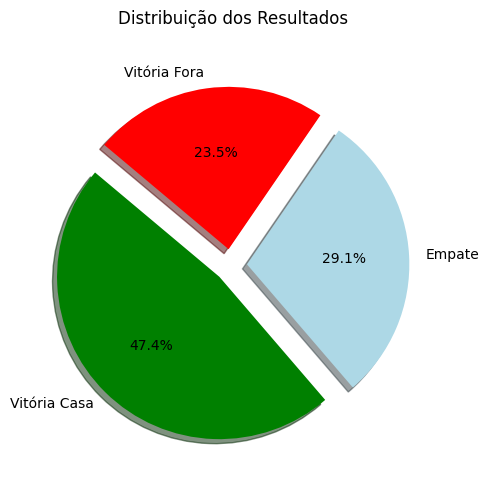

In [19]:
vitorias_casa = resultados.count('Vitória Casa')
empates = resultados.count('Empate')
vitorias_fora = resultados.count('Vitória Fora')

# Dados para o gráfico de pizza
labels = ['Vitória Casa', 'Empate', 'Vitória Fora']
sizes = [vitorias_casa, empates, vitorias_fora]
colors = ['green', 'lightblue', 'red']
explode = (0.1, 0.1, 0.1)  # Destacar o primeiro pedaço

# Plotar o gráfico de pizza
plt.figure(figsize=(5, 6))
plt.pie(sizes, explode=explode, colors=colors,labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Distribuição dos Resultados')
plt.axis('equal')
plt.show()

#plotando o gráfico das quantidades de vitórias em casa,  fora e empates

## Do gráfico acima, podemos concluir que em quase 50% das partidas o time mandante ganhou!

# Reodernação de colunas

In [20]:
# Remove as colunas e armazena em uma variável em forma de Série
temporadas = brasileirao.pop('temporada')
rodadas = brasileirao.pop('rodada')

#Insere as colunas no DataFrame com o índice desejado
brasileirao.insert(0, 'temporada', temporadas)
brasileirao.insert(2, 'rodada', rodadas)
brasileirao.tail()



,temporada,data_jogo,rodada,time_casa,time_fora,gols_casa,gols_fora,placar,resultado
4165,2022,1970-01-01 00:00:00.000000099,37,Botafogo-RJ,Santos-SP,99,99,99-99,Empate
4166,2022,1970-01-01 00:00:00.000000099,37,Palmeiras-SP,America-MG,99,99,99-99,Empate
4167,2022,1970-01-01 00:00:00.000000099,37,Sao Paulo-SP,Internacional-RS,99,99,99-99,Empate
4168,2022,1970-01-01 00:00:00.000000099,37,Fluminense-RJ,Goias-GO,99,99,99-99,Empate
4169,2022,1970-01-01 00:00:00.000000099,37,Atletico-MG,Cuiaba-MT,99,99,99-99,Empate


## Legenda
#### temporada: Ano/temporada do campeonato em disputa

#### data_jogo: Data e horário em que o jogo foi realizado

#### rodada: Rodada do campeonato em disputa

#### time_casa: Time que jogou como mandante

#### time_fora: time que jogou como visitante

#### gols_casa: Gols do time mandante no jogo inteiro (=99 caso seja nulo)

#### gols_fora: Gols do time visitante no jogo inteiro (=99 caso seja nulo)

#### placar: Placar final do jogo disputado (='99-99' caso seja nulo)
#### resultado: Resultado final do jogo disputado

# 
## Todos os times que participaram das edições de 2012 até 2021



In [21]:
times = sorted(brasileirao['time_casa'].unique())
times

['America-MG',
 'Atletico-GO',
 'Atletico-MG',
 'Atletico-PR',
 'Avai-SC',
 'Bahia-BA',
 'Botafogo-RJ',
 'Ceara-CE',
 'Chapecoense-SC',
 'Corinthians-SP',
 'Coritiba-PR',
 'Criciuma-SC',
 'Cruzeiro-MG',
 'Csa-AL',
 'Cuiaba-MT',
 'Figueirense-SC',
 'Flamengo-RJ',
 'Fluminense-RJ',
 'Fortaleza-CE',
 'Goias-GO',
 'Gremio-RS',
 'Internacional-RS',
 'Joinville-SC',
 'Juventude-RS',
 'Nautico-PE',
 'Palmeiras-SP',
 'Parana-PR',
 'Ponte Preta-SP',
 'Portuguesa-SP',
 'Red Bull Bragantino-SP',
 'Santa Cruz-PE',
 'Santos-SP',
 'Sao Paulo-SP',
 'Sport-PE',
 'Vasco da Gama-RJ',
 'Vitoria-BA']

In [22]:


print(f'{len(times)} disputaram a série A do brasileirão entre as temporadas 2012 e 2022')
print('\n Os times que participaram foram: \n')
for i, time in enumerate(times):
    print(f"{i+1} - {time}")



36 disputaram a série A do brasileirão entre as temporadas 2012 e 2022

 Os times que participaram foram: 

1 - America-MG
2 - Atletico-GO
3 - Atletico-MG
4 - Atletico-PR
5 - Avai-SC
6 - Bahia-BA
7 - Botafogo-RJ
8 - Ceara-CE
9 - Chapecoense-SC
10 - Corinthians-SP
11 - Coritiba-PR
12 - Criciuma-SC
13 - Cruzeiro-MG
14 - Csa-AL
15 - Cuiaba-MT
16 - Figueirense-SC
17 - Flamengo-RJ
18 - Fluminense-RJ
19 - Fortaleza-CE
20 - Goias-GO
21 - Gremio-RS
22 - Internacional-RS
23 - Joinville-SC
24 - Juventude-RS
25 - Nautico-PE
26 - Palmeiras-SP
27 - Parana-PR
28 - Ponte Preta-SP
29 - Portuguesa-SP
30 - Red Bull Bragantino-SP
31 - Santa Cruz-PE
32 - Santos-SP
33 - Sao Paulo-SP
34 - Sport-PE
35 - Vasco da Gama-RJ
36 - Vitoria-BA


In [23]:
#Times que estiveram presentes em todas as 10 temporadas
# Conta a quantidade de jogos que cada time teve jogando em casa
times_jogos_casa = brasileirao['time_casa'].value_counts()
# Como cada temporada tem 38 jogos, sendo 19 como mandante e 19 como visitante, então  ntão o time que jogou 1 temporada 
# terá jogado 19 partidas dentro de casa e 19 fora.

times_unanimes = times_jogos_casa.loc[times_jogos_casa > 200].index.to_list()


In [24]:
times_menos_temporadas = times_jogos_casa.loc[times_jogos_casa < 20].index.to_list()

In [25]:


brasileirao.head()

,temporada,data_jogo,rodada,time_casa,time_fora,gols_casa,gols_fora,placar,resultado
0,2012,2012-05-19 18:30:00,1,Palmeiras-SP,Portuguesa-SP,1,1,1-1,Empate
1,2012,2012-05-19 18:30:00,1,Sport-PE,Flamengo-RJ,1,1,1-1,Empate
2,2012,2012-05-19 21:00:00,1,Figueirense-SC,Nautico-PE,2,1,2-1,Vitória Casa
3,2012,2012-05-20 16:00:00,1,Ponte Preta-SP,Atletico-MG,0,1,0-1,Vitória Fora
4,2012,2012-05-20 16:00:00,1,Corinthians-SP,Fluminense-RJ,0,1,0-1,Vitória Fora


# percentuais de vitória e empates

In [26]:
# Remove o jogo que possui valor nulo (99x99 no placar) para não interferir na análise, pois não se sabe o resultado do jogo.
brasileirao = brasileirao[brasileirao['gols_casa'] != 99]
brasileirao

,temporada,data_jogo,rodada,time_casa,time_fora,gols_casa,gols_fora,placar,resultado
0,2012,2012-05-19 18:30:00,1,Palmeiras-SP,Portuguesa-SP,1,1,1-1,Empate
1,2012,2012-05-19 18:30:00,1,Sport-PE,Flamengo-RJ,1,1,1-1,Empate
2,2012,2012-05-19 21:00:00,1,Figueirense-SC,Nautico-PE,2,1,2-1,Vitória Casa
3,2012,2012-05-20 16:00:00,1,Ponte Preta-SP,Atletico-MG,0,1,0-1,Vitória Fora
4,2012,2012-05-20 16:00:00,1,Corinthians-SP,Fluminense-RJ,0,1,0-1,Vitória Fora
...,...,...,...,...,...,...,...,...,...
4055,2022,2022-09-11 11:00:00,26,Avai-SC,Atletico-PR,1,1,1-1,Empate
4056,2022,2022-09-11 11:00:00,26,Botafogo-RJ,America-MG,0,0,0-0,Empate
4057,2022,2022-09-11 16:00:00,26,Coritiba-PR,Atletico-GO,2,0,2-0,Vitória Casa
4058,2022,2022-09-11 16:00:00,26,Sao Paulo-SP,Corinthians-SP,1,1,1-1,Empate


In [27]:


#armazena na variável a quantidade de vitória casa, vitória fora e empate, ambos o número total de cada time
percentual_resultados = brasileirao['resultado'].value_counts(normalize=True) * 100

print(f'Percentuais dos resultados dos times:\n')
print(f'Vitória do mandante: {percentual_resultados[0]:.2f}%')
print(f'Vitória do visitante: {percentual_resultados[1]:.2f}%')
print(f'Empate: {percentual_resultados[2]:.2f}%')

Percentuais dos resultados dos times:

Vitória do mandante: 48.71%
Vitória do visitante: 27.20%
Empate: 24.09%


C:\Users\Vinicius307\AppData\Local\Temp\ipykernel_3252\3557345762.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Vitória do mandante: {percentual_resultados[0]:.2f}%')
C:\Users\Vinicius307\AppData\Local\Temp\ipykernel_3252\3557345762.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Vitória do visitante: {percentual_resultados[1]:.2f}%')
C:\Users\Vinicius307\AppData\Local\Temp\ipykernel_3252\3557345762.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acces

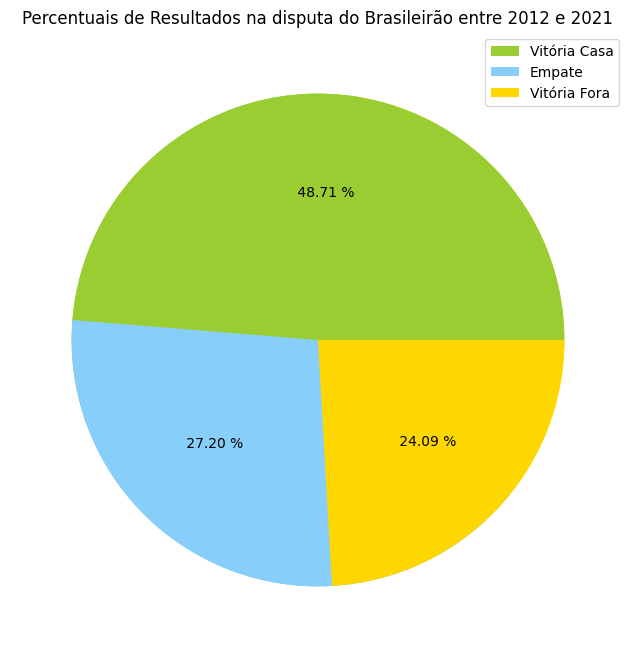

In [28]:

plt.figure(figsize=(8,8))

sizes=[0.7,0.7,0.7]
colors = ['yellowgreen', 'lightskyblue', 'gold']
patches, texts = plt.pie(sizes, colors=colors, startangle=80)
plt.legend(patches, percentual_resultados.index, loc="best")

plt.pie(percentual_resultados.values, autopct= '% .2f %%', colors=colors)
plt.title('Percentuais de Resultados na disputa do Brasileirão entre 2012 e 2021')

plt.show()

In [29]:
brasileirao_times = pd.DataFrame()

In [30]:
#armazena na variavel o total de jogos de cada time
total_jogos_times = brasileirao['time_casa'].value_counts()  + brasileirao['time_fora'].value_counts()


## Total de vitórias, derrotas e empates em casa de cada time

In [31]:
 #Armazena nas variáveis o total de vitórias, derrotas e empates, respectivamente, de cada time jogando em casa
# Foi criada uma série com o valor 0 atribuído a todos os times para não prejudicar nas análises,
# pois poderia acontecer de algum time não ganhar nenhum jogo em casa, por exemplo, e ficar de fora da série final
total_vitorias_casa = pd.Series([0] * len(times), index=times)
total_vitorias_casa += brasileirao.loc[brasileirao['resultado'] == 'Vitória Casa']['time_casa'].value_counts()
total_vitorias_casa = total_vitorias_casa.fillna(0).astype(np.int64)

total_derrotas_casa = pd.Series([0] * len(times), index=times)
total_derrotas_casa += brasileirao.loc[brasileirao['resultado'] == 'Vitória Fora']['time_casa'].value_counts()
total_derrotas_casa = total_derrotas_casa.fillna(0).astype(np.int64)

total_empates_casa = pd.Series([0] * len(times), index=times)
total_empates_casa += brasileirao.loc[brasileirao['resultado'] == 'Empate']['time_casa'].value_counts()
total_empates_casa = total_empates_casa.fillna(0).astype(np.int64)
total_empates_casa

# Armazena nas variáveis o total de gols de cada time jogando em casa
total_gols_marcados_casa = brasileirao.groupby(brasileirao['time_casa'])['gols_casa'].sum()
total_gols_sofridos_casa = brasileirao.groupby(brasileirao['time_casa'])['gols_fora'].sum()


## Total de vitórias, derrotas e empates jogando fora de cada time

In [47]:
#armazena nas variáveis o total de vitórias, derrotas e empates,respectivamente, de cada time jogando fora
total_vitorias_fora = pd.Series([0] * len(times), index=times)
total_vitorias_fora += brasileirao.loc[brasileirao['resultado'] == 'Vitória Fora']['time_fora'].value_counts()

total_derrotas_fora = pd.Series([0] * len(times), index=times)
total_derrotas_fora += brasileirao.loc[brasileirao['resultado']=='Vitória Casa']['time_fora'].value_counts()

total_empates_fora = pd.Series([0] * len(times), index=times)
total_empates_fora += brasileirao.loc[brasileirao['resultado']=='Empate']['time_fora'].value_counts()
total_empates_fora

# Armazena nas variáveis o total de gols de cada time jogando fora
total_gols_marcados_fora = brasileirao.groupby(brasileirao['time_fora'])['gols_fora'].sum()
total_gols_sofridos_fora = brasileirao.groupby(brasileirao['time_fora'])['gols_casa'].sum()
total_gols_marcados_fora


time_fora
America-MG                 43
Atletico-GO                78
Atletico-MG               234
Atletico-PR               169
Avai-SC                    41
Bahia-BA                  139
Botafogo-RJ               147
Ceara-CE                   87
Chapecoense-SC            112
Corinthians-SP            191
Coritiba-PR               128
Criciuma-SC                32
Cruzeiro-MG               154
Csa-AL                      7
Cuiaba-MT                  24
Figueirense-SC             56
Flamengo-RJ               250
Fluminense-RJ             206
Fortaleza-CE               71
Goias-GO                   95
Gremio-RS                 193
Internacional-RS          168
Joinville-SC                7
Juventude-RS               26
Nautico-PE                 21
Palmeiras-SP              214
Parana-PR                   5
Ponte Preta-SP             78
Portuguesa-SP              32
Red Bull Bragantino-SP     58
Santa Cruz-PE              18
Santos-SP                 184
Sao Paulo-SP              209


In [50]:
#Total de gols acumulados de cada time
total_gols_marcados = total_gols_marcados_casa + total_gols_marcados_fora
total_gols_sofridos = total_gols_sofridos_casa + total_gols_sofridos_fora

total_pontos_times = (total_vitorias_casa * 3) + (total_vitorias_fora * 3) + total_empates_casa + total_empates_fora
total_pontos_times

America-MG                157
Atletico-GO               191
Atletico-MG               675
Atletico-PR               541
Avai-SC                   130
Bahia-BA                  366
Botafogo-RJ               414
Ceara-CE                  216
Chapecoense-SC            287
Corinthians-SP            636
Coritiba-PR               335
Criciuma-SC                78
Cruzeiro-MG               460
Csa-AL                     32
Cuiaba-MT                  73
Figueirense-SC            157
Flamengo-RJ               676
Fluminense-RJ             582
Fortaleza-CE              182
Goias-GO                  269
Gremio-RS                 613
Internacional-RS          562
Joinville-SC               31
Juventude-RS               64
Nautico-PE                 69
Palmeiras-SP              602
Parana-PR                  23
Ponte Preta-SP            228
Portuguesa-SP              93
Red Bull Bragantino-SP    142
Santa Cruz-PE              31
Santos-SP                 617
Sao Paulo-SP              621
Sport-PE  

In [52]:
# Aproveitamento final (em %) cada time após todas as temporadas
aproveitamento_final_times = total_pontos_times / (total_jogos_times * 3) * 100
aproveitamento_final_times

America-MG                37.380952
Atletico-GO               35.767790
Atletico-MG               55.555556
Atletico-PR               49.003623
Avai-SC                   30.952381
Bahia-BA                  40.131579
Botafogo-RJ               41.818182
Ceara-CE                  40.449438
Chapecoense-SC            36.100629
Corinthians-SP            52.216749
Coritiba-PR               38.242009
Criciuma-SC               34.210526
Cruzeiro-MG               50.438596
Csa-AL                    28.070175
Cuiaba-MT                 38.020833
Figueirense-SC            34.429825
Flamengo-RJ               55.500821
Fluminense-RJ             47.783251
Fortaleza-CE              43.333333
Goias-GO                  41.512346
Gremio-RS                 53.771930
Internacional-RS          50.905797
Joinville-SC              27.192982
Juventude-RS              33.333333
Nautico-PE                30.263158
Palmeiras-SP              54.528986
Parana-PR                 20.175439
Ponte Preta-SP            40

# Quantidade de temporadas disputadas por cada time
#### Retorna a quantidade de temporadas disputadas pelo time de acordo com a quantidade total de jogos disputados por ele."
    "

In [58]:
def temporadas_competidas(total_jogos_times):
    temporadas_disputadas = 0
    
    if total_jogos_times <= 38 * 1:
        temporadas_disputadas += 1
    elif total_jogos_times <= 38 * 2:
        temporadas_disputadas += 2
    elif total_jogos_times <= 38 * 3:
        temporadas_disputadas += 3
    elif total_jogos_times <= 38 * 4:
        temporadas_disputadas += 4
    elif total_jogos_times <= 38 * 5:
        temporadas_disputadas += 5
    elif total_jogos_times <= 38 * 6:
        temporadas_disputadas += 6
    elif total_jogos_times <= 38 * 7:
        temporadas_disputadas += 7
    elif total_jogos_times <= 38 * 8:
        temporadas_disputadas += 8
    elif total_jogos_times <= 38 * 9:
        temporadas_disputadas += 9   
    else:
        temporadas_disputadas += 10
    
    return temporadas_disputadas

# Adição dos dados no DataFrame

In [61]:
# Cria as colunas no DataFrame
brasileirao_times['total_jogos'] = total_jogos_times
brasileirao_times['qtde_temporadas_disputadas'] = brasileirao_times.total_jogos.apply(lambda x: temporadas_competidas(x))
brasileirao_times['total_vitorias_casa'] = total_vitorias_casa
brasileirao_times['total_empates_casa'] = total_empates_casa
brasileirao_times['total_derrotas_casa'] = total_derrotas_casa
brasileirao_times['total_gols_marcados_casa'] = total_gols_marcados_casa
brasileirao_times['total_gols_sofridos_casa'] = total_gols_sofridos_casa
brasileirao_times['total_vitorias_fora'] = total_vitorias_fora
brasileirao_times['total_empates_fora'] = total_empates_fora
brasileirao_times['total_derrotas_fora'] = total_derrotas_fora
brasileirao_times['total_gols_marcados_fora'] = total_gols_marcados_fora
brasileirao_times['total_gols_sofridos_fora'] = total_gols_sofridos_fora
brasileirao_times['total_gols_marcados'] = total_gols_marcados
brasileirao_times['total_gols_sofridos'] = total_gols_sofridos
brasileirao_times['total_pontos'] = total_pontos_times
brasileirao_times['aproveitamento_final_%'] = round(aproveitamento_final_times, 2)
brasileirao_times

,total_jogos,qtde_temporadas_disputadas,total_vitorias_fora,total_empates_fora,total_derrotas_fora,total_gols_marcados_fora,total_gols_sofridos_fora,total_gols_marcados,total_gols_sofridos,total_pontos,aproveitamento_final_%,total_vitorias_casa,total_empates_casa,total_derrotas_casa,total_gols_marcados_casa,total_gols_sofridos_casa
America-MG,140,4,9,18,43,43,108,116,167,157,37.38,31,19,20,73,59
Atletico-GO,178,5,21,23,45,78,142,171,244,191,35.77,25,30,34,93,102
Atletico-MG,405,10,60,66,76,234,271,608,459,675,55.56,130,39,34,374,188
Atletico-PR,368,10,47,42,96,169,248,449,393,541,49.00,105,43,35,280,145
Avai-SC,140,4,11,13,46,41,122,110,209,130,30.95,19,27,24,69,87
Bahia-BA,304,8,30,44,78,139,221,328,371,366,40.13,62,46,44,189,150
Botafogo-RJ,330,9,39,41,85,147,233,360,403,414,41.82,72,40,53,213,170
Ceara-CE,178,5,16,31,42,87,111,187,194,216,40.45,35,32,22,100,83
Chapecoense-SC,265,7,22,40,71,112,217,261,359,287,36.10,48,37,47,149,142
Corinthians-SP,406,10,57,60,86,191,223,487,370,636,52.22,113,66,24,296,147


# Gráficos baseados no novo DataFrame


### Temporadas disputadas

In [63]:
br_times_temporadas = brasileirao_times['qtde_temporadas_disputadas'].sort_values(ascending=False)
br_times_temporadas

Internacional-RS          10
Atletico-MG               10
Atletico-PR               10
Gremio-RS                 10
Fluminense-RJ             10
Flamengo-RJ               10
Santos-SP                 10
Corinthians-SP            10
Sao Paulo-SP              10
Palmeiras-SP              10
Botafogo-RJ                9
Cruzeiro-MG                8
Sport-PE                   8
Coritiba-PR                8
Bahia-BA                   8
Chapecoense-SC             7
Vasco da Gama-RJ           7
Goias-GO                   6
Ponte Preta-SP             5
Ceara-CE                   5
Atletico-GO                5
Vitoria-BA                 5
America-MG                 4
Figueirense-SC             4
Avai-SC                    4
Fortaleza-CE               4
Red Bull Bragantino-SP     3
Juventude-RS               2
Nautico-PE                 2
Portuguesa-SP              2
Cuiaba-MT                  2
Criciuma-SC                2
Joinville-SC               1
Parana-PR                  1
Santa Cruz-PE 

C:\Users\Vinicius307\AppData\Local\Temp\ipykernel_3252\4169657918.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=br_times_temporadas.values, y=br_times_temporadas.index, palette='mako')
C:\Users\Vinicius307\Downloads\Winpython64-3.11.5.0\WPy64-31150\python-3.11.5.amd64\Lib\site-packages\seaborn\_oldcore.py:1124: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vinicius307\Downloads\Winpython64-3.11.5.0\WPy64-31150\python-3.11.5.amd64\Lib\site-packages\seaborn\_oldcore.py:1124: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


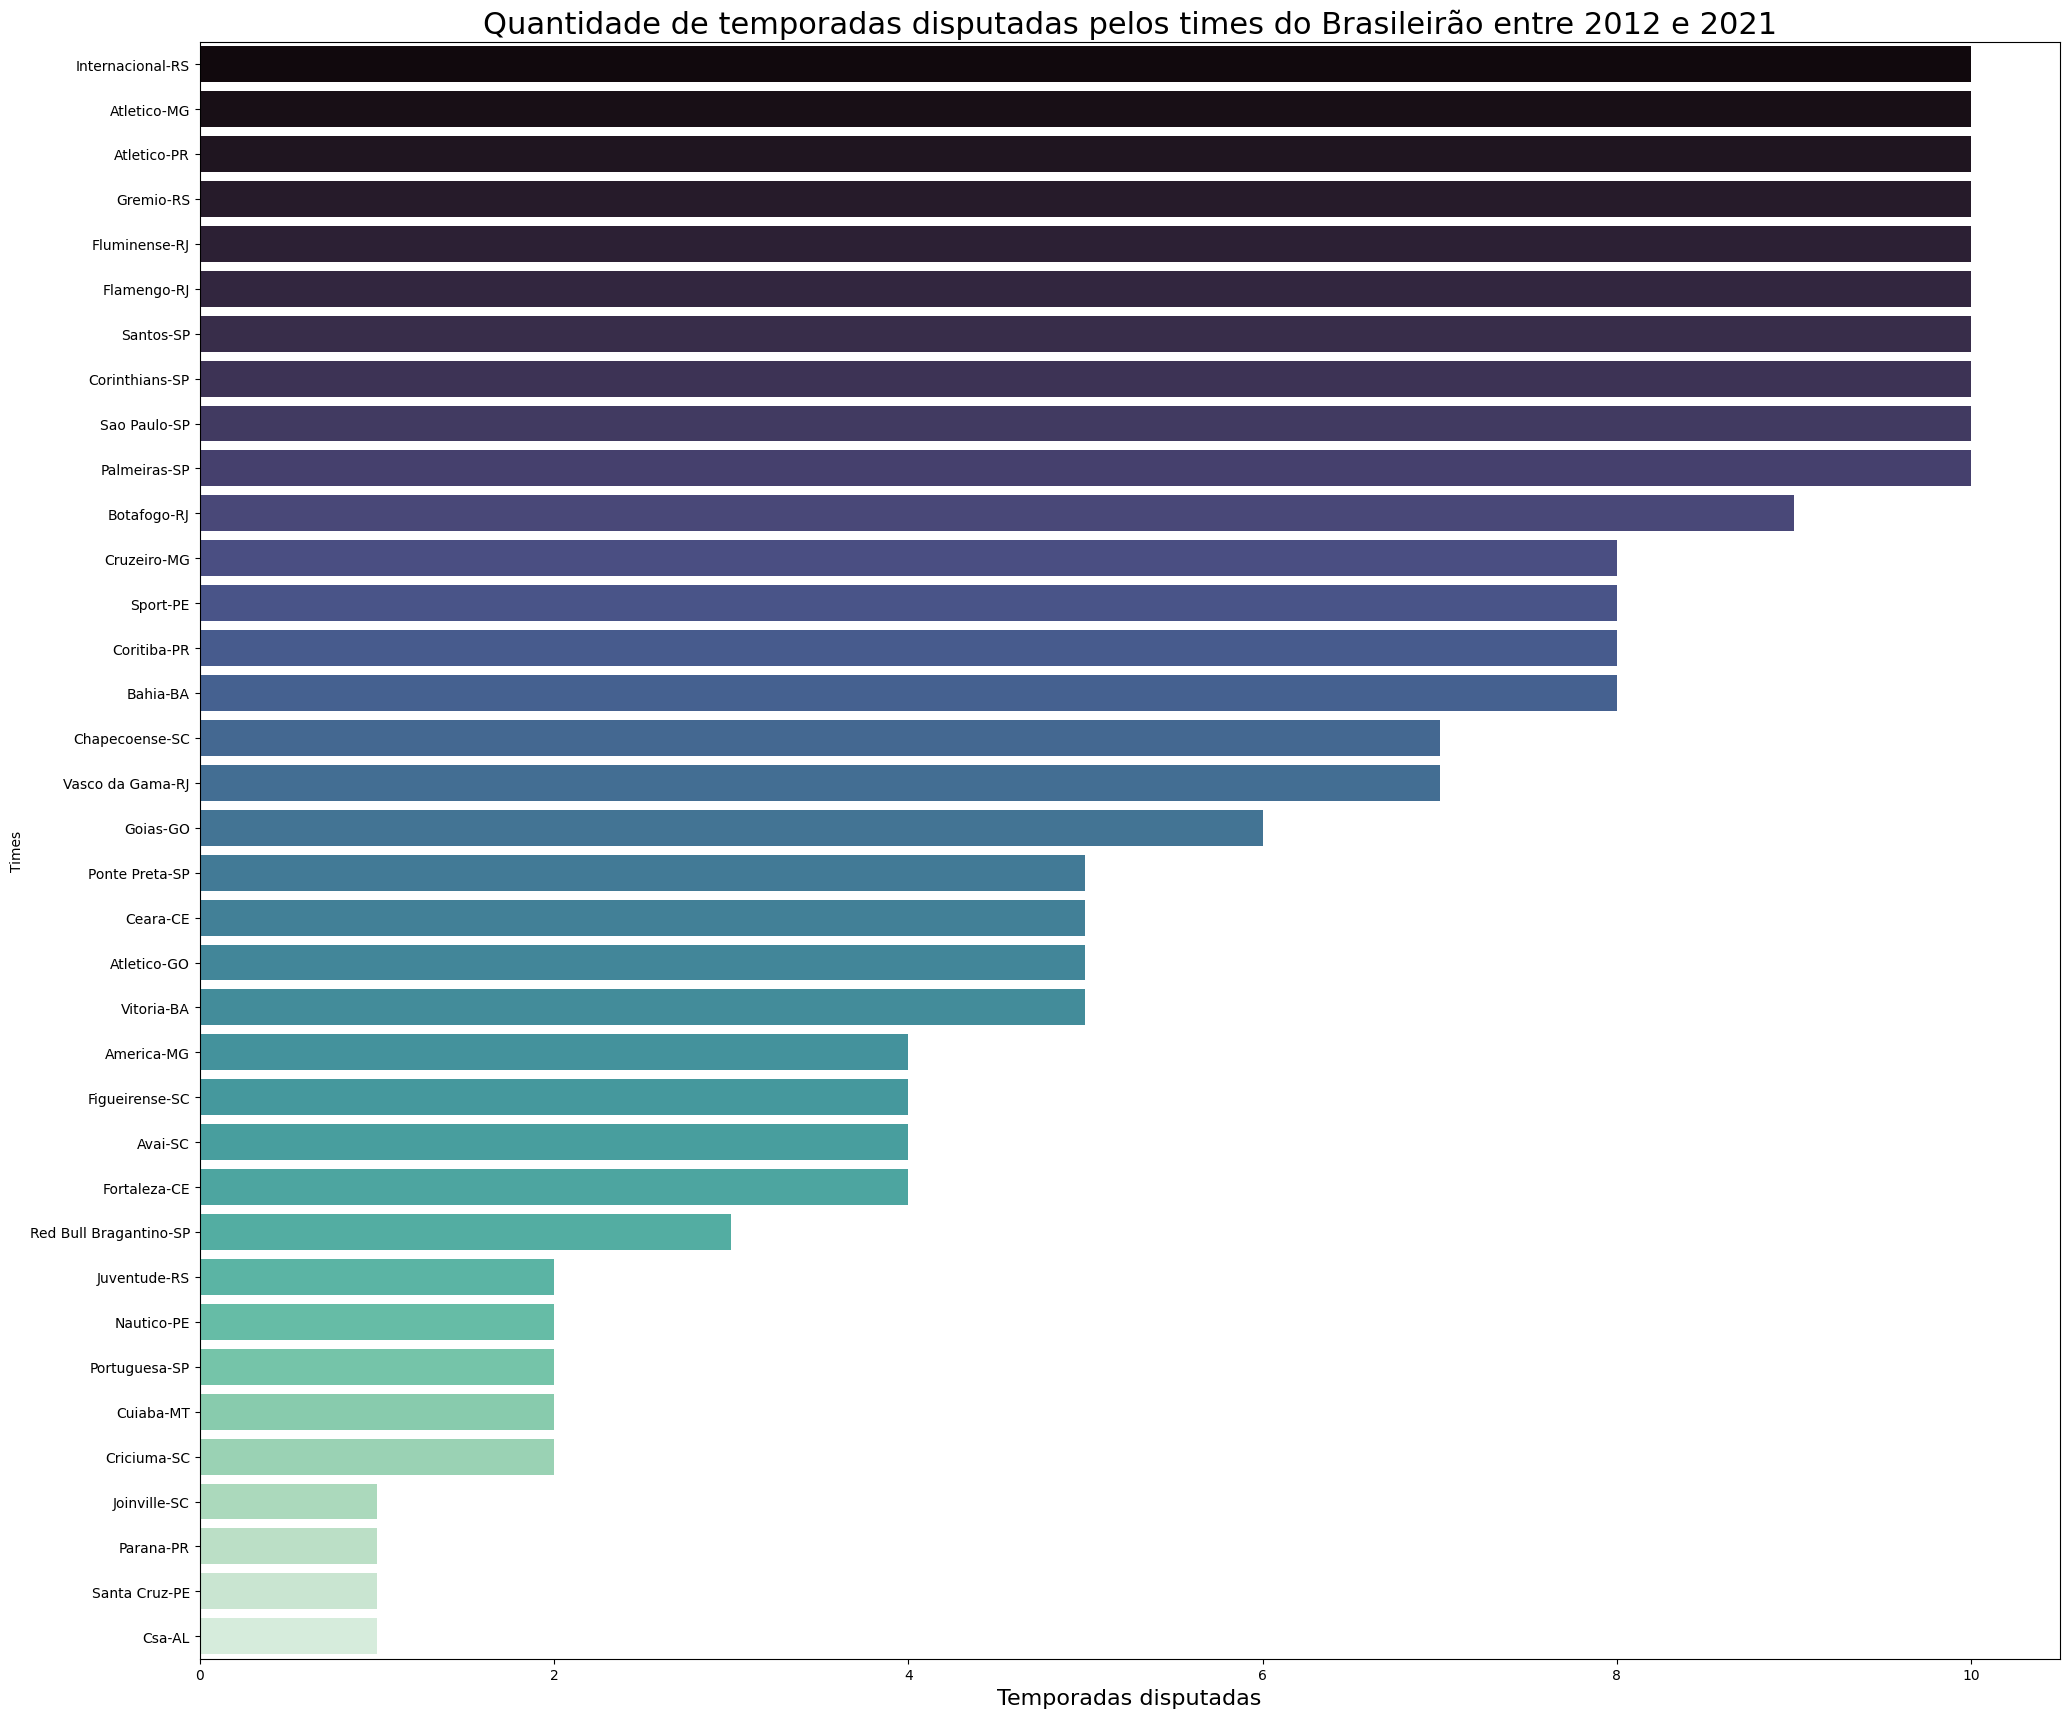

In [66]:
# plotando gráfico da quantidade de temporadas disputadas por times entre 2012 e 2021

fig, ax = plt.subplots(figsize=(24, 21))
ax = sns.barplot(x=br_times_temporadas.values, y=br_times_temporadas.index, palette='mako')
ax.set_title('Quantidade de temporadas disputadas pelos times do Brasileirão entre 2012 e 2021', fontsize=22)
ax.set_xlabel('Temporadas disputadas', fontsize=16)
ax.set_ylabel('Times')
plt.show()

In [67]:
br_times_pts = brasileirao_times['total_pontos'].sort_values(ascending=False)
br_times_pts

Flamengo-RJ               676
Atletico-MG               675
Corinthians-SP            636
Sao Paulo-SP              621
Santos-SP                 617
Gremio-RS                 613
Palmeiras-SP              602
Fluminense-RJ             582
Internacional-RS          562
Atletico-PR               541
Cruzeiro-MG               460
Botafogo-RJ               414
Sport-PE                  366
Bahia-BA                  366
Coritiba-PR               335
Vasco da Gama-RJ          332
Chapecoense-SC            287
Goias-GO                  269
Ponte Preta-SP            228
Vitoria-BA                222
Ceara-CE                  216
Atletico-GO               191
Fortaleza-CE              182
Figueirense-SC            157
America-MG                157
Red Bull Bragantino-SP    142
Avai-SC                   130
Portuguesa-SP              93
Criciuma-SC                78
Cuiaba-MT                  73
Nautico-PE                 69
Juventude-RS               64
Csa-AL                     32
Joinville-

C:\Users\Vinicius307\AppData\Local\Temp\ipykernel_3252\523356294.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=br_times_pts.values, y=br_times_pts.index,palette='rocket')
C:\Users\Vinicius307\Downloads\Winpython64-3.11.5.0\WPy64-31150\python-3.11.5.amd64\Lib\site-packages\seaborn\_oldcore.py:1124: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vinicius307\Downloads\Winpython64-3.11.5.0\WPy64-31150\python-3.11.5.amd64\Lib\site-packages\seaborn\_oldcore.py:1124: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


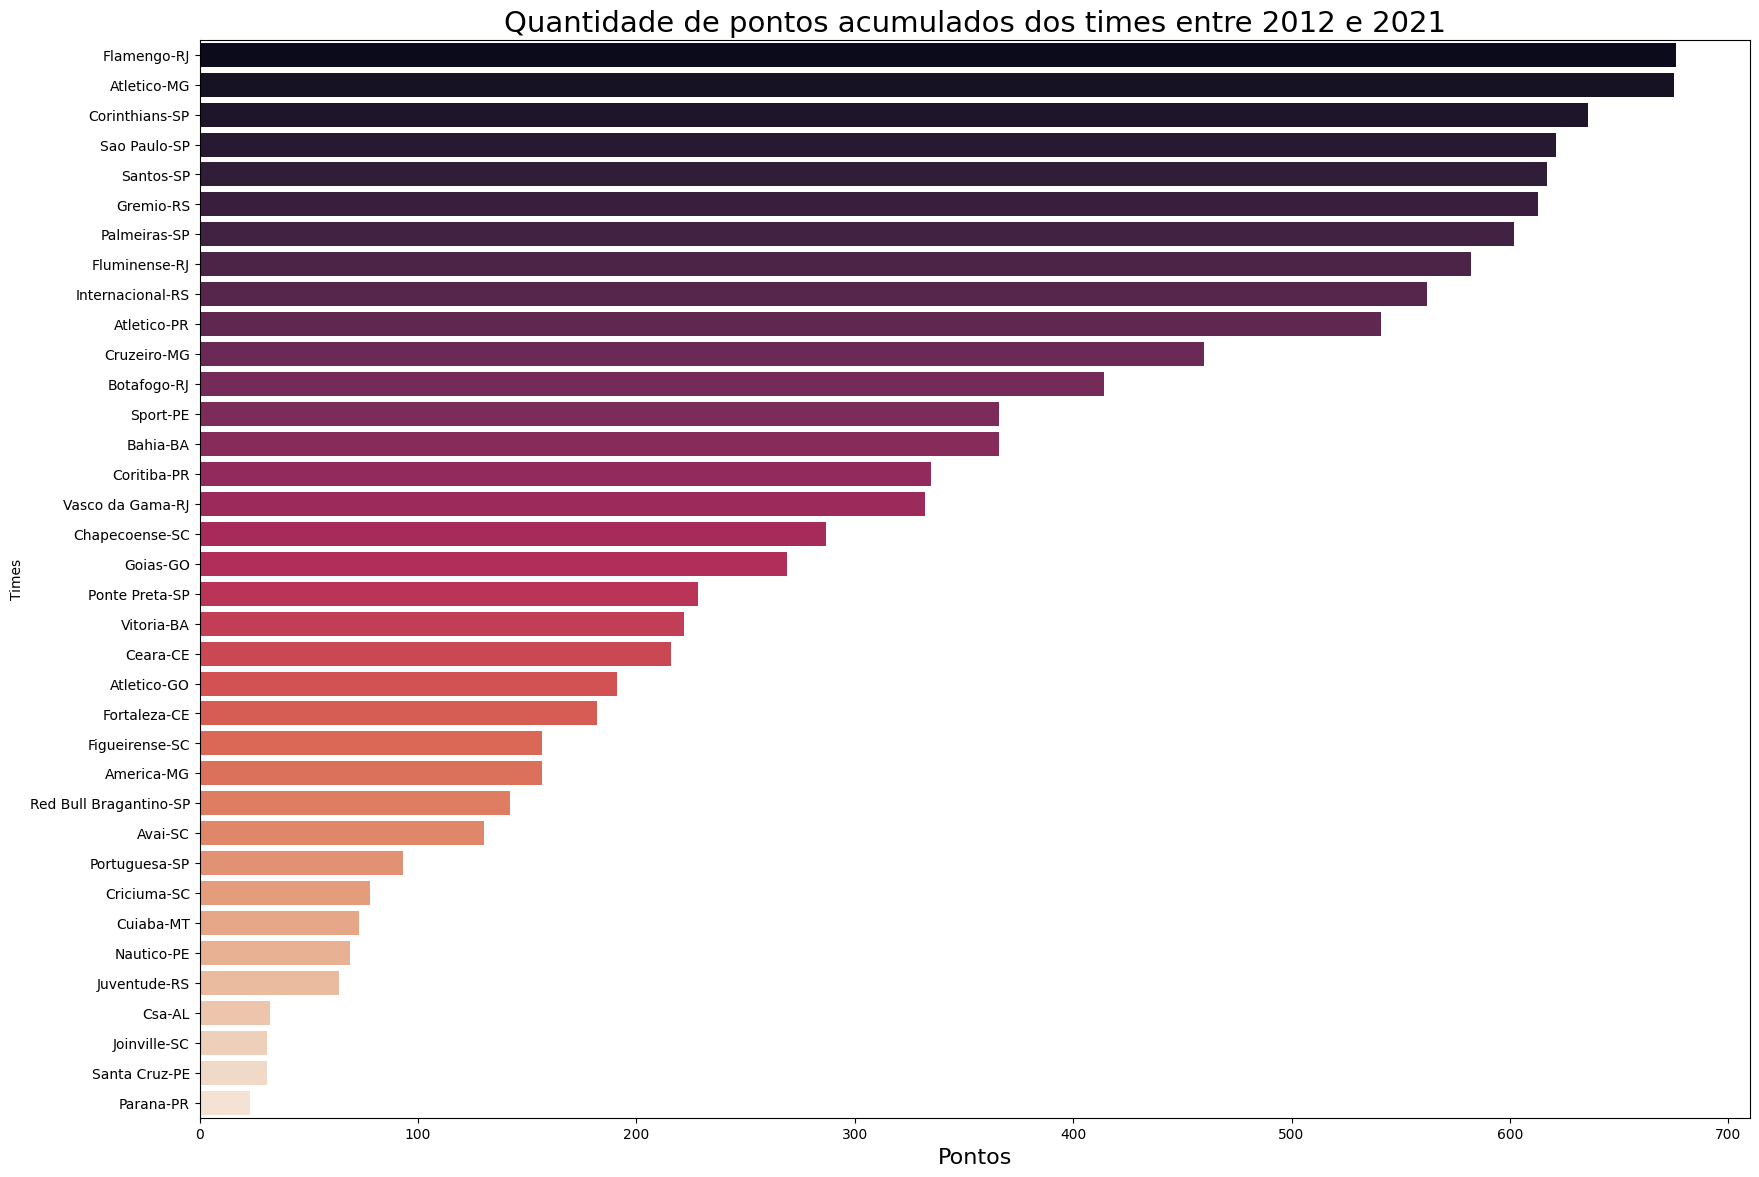

In [69]:
fig,ax = plt.subplots(figsize=(20,14))
ax = sns.barplot(x=br_times_pts.values, y=br_times_pts.index,palette='rocket')
ax.set_title('Quantidade de pontos acumulados dos times entre 2012 e 2021', fontsize=21)
ax.set_xlabel('Pontos',fontsize=16)
ax.set_ylabel('Times')
plt.show()

C:\Users\Vinicius307\AppData\Local\Temp\ipykernel_3252\195366527.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=br_gols_marcados.values,y=br_gols_marcados.index, palette = 'viridis')
C:\Users\Vinicius307\Downloads\Winpython64-3.11.5.0\WPy64-31150\python-3.11.5.amd64\Lib\site-packages\seaborn\_oldcore.py:1124: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vinicius307\Downloads\Winpython64-3.11.5.0\WPy64-31150\python-3.11.5.amd64\Lib\site-packages\seaborn\_oldcore.py:1124: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


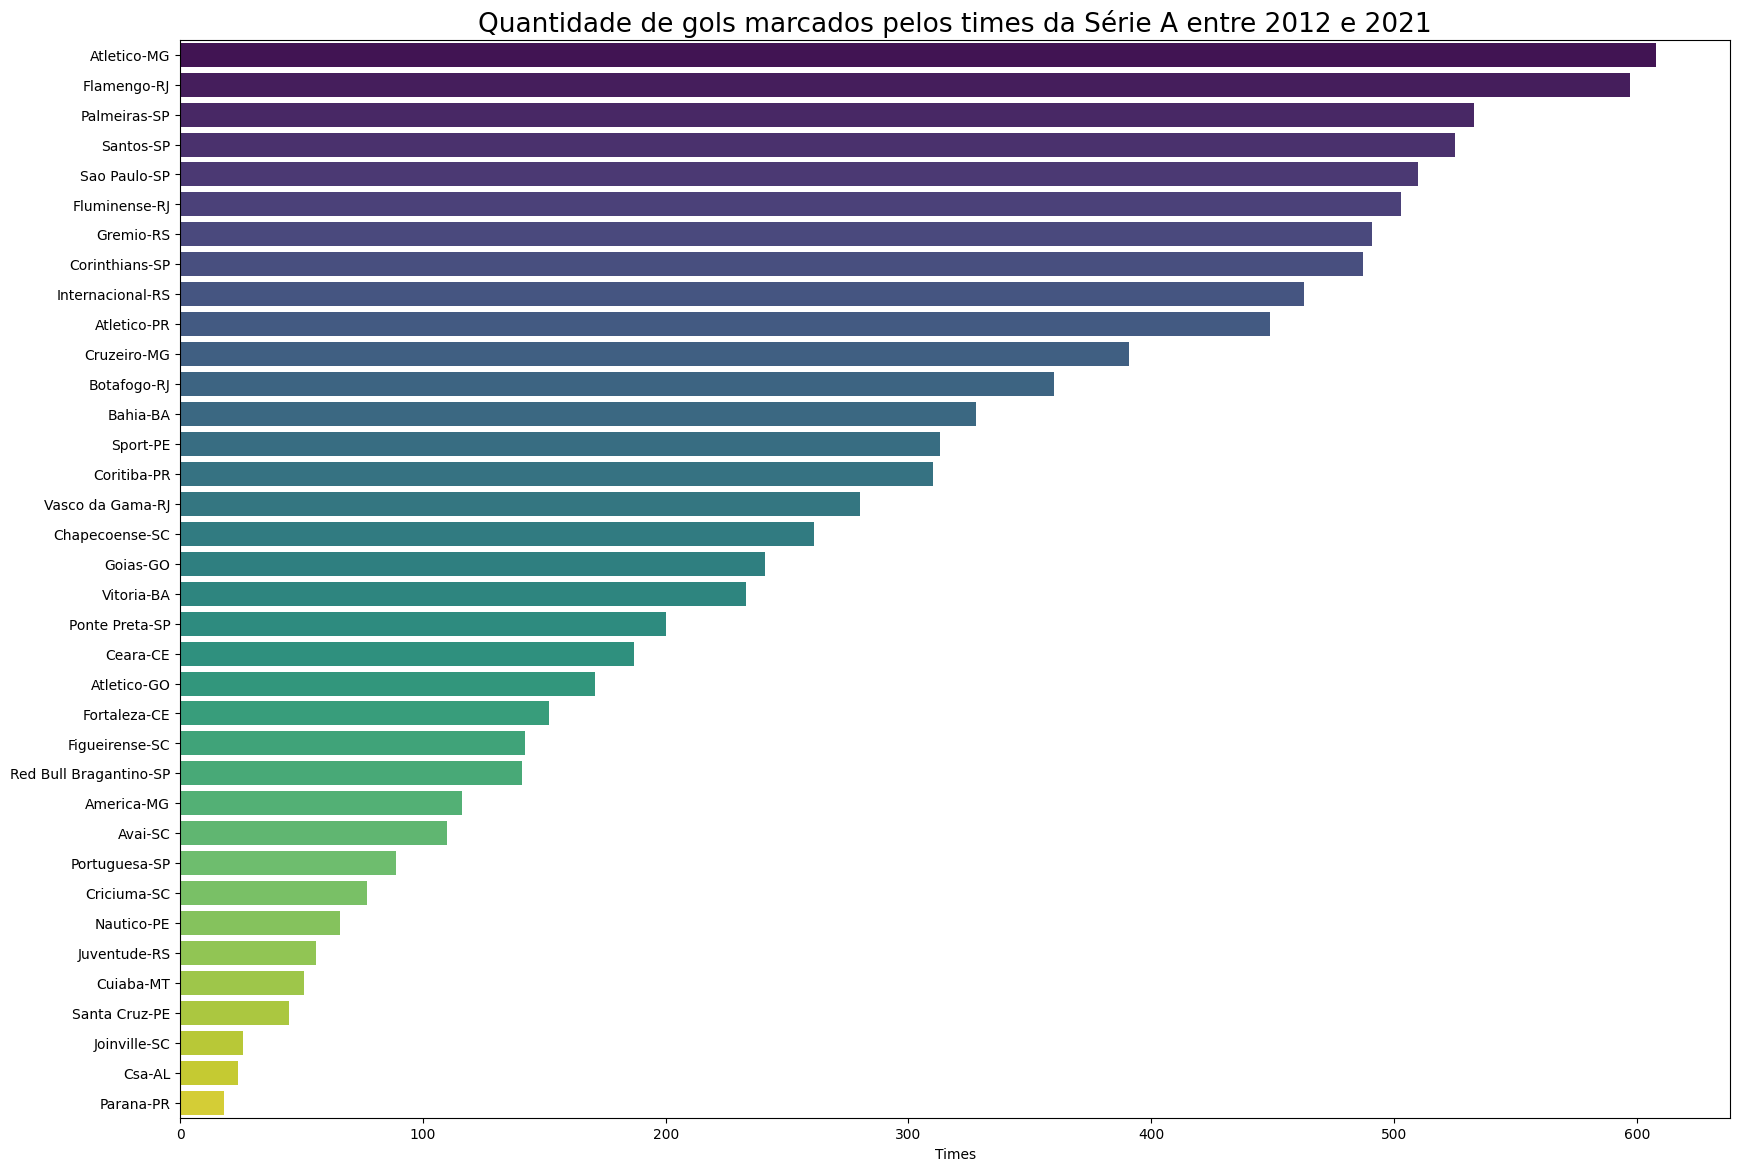

In [76]:
br_gols_marcados = brasileirao_times['total_gols_marcados'].sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(20,14))
ax = sns.barplot(x=br_gols_marcados.values,y=br_gols_marcados.index, palette = 'viridis')
ax.set_title('Quantidade de gols marcados pelos times da Série A entre 2012 e 2021',fontsize=19)
ax.set_xlabel('Times')
plt.show()

In [77]:
br_gols_sofridos = brasileirao_times['total_gols_sofridos'].sort_values(ascending=False)



C:\Users\Vinicius307\AppData\Local\Temp\ipykernel_3252\2565547740.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
C:\Users\Vinicius307\Downloads\Winpython64-3.11.5.0\WPy64-31150\python-3.11.5.amd64\Lib\site-packages\seaborn\_oldcore.py:1124: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vinicius307\Downloads\Winpython64-3.11.5.0\WPy64-31150\python-3.11.5.amd64\Lib\site-packages\seaborn\_oldcore.py:1124: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


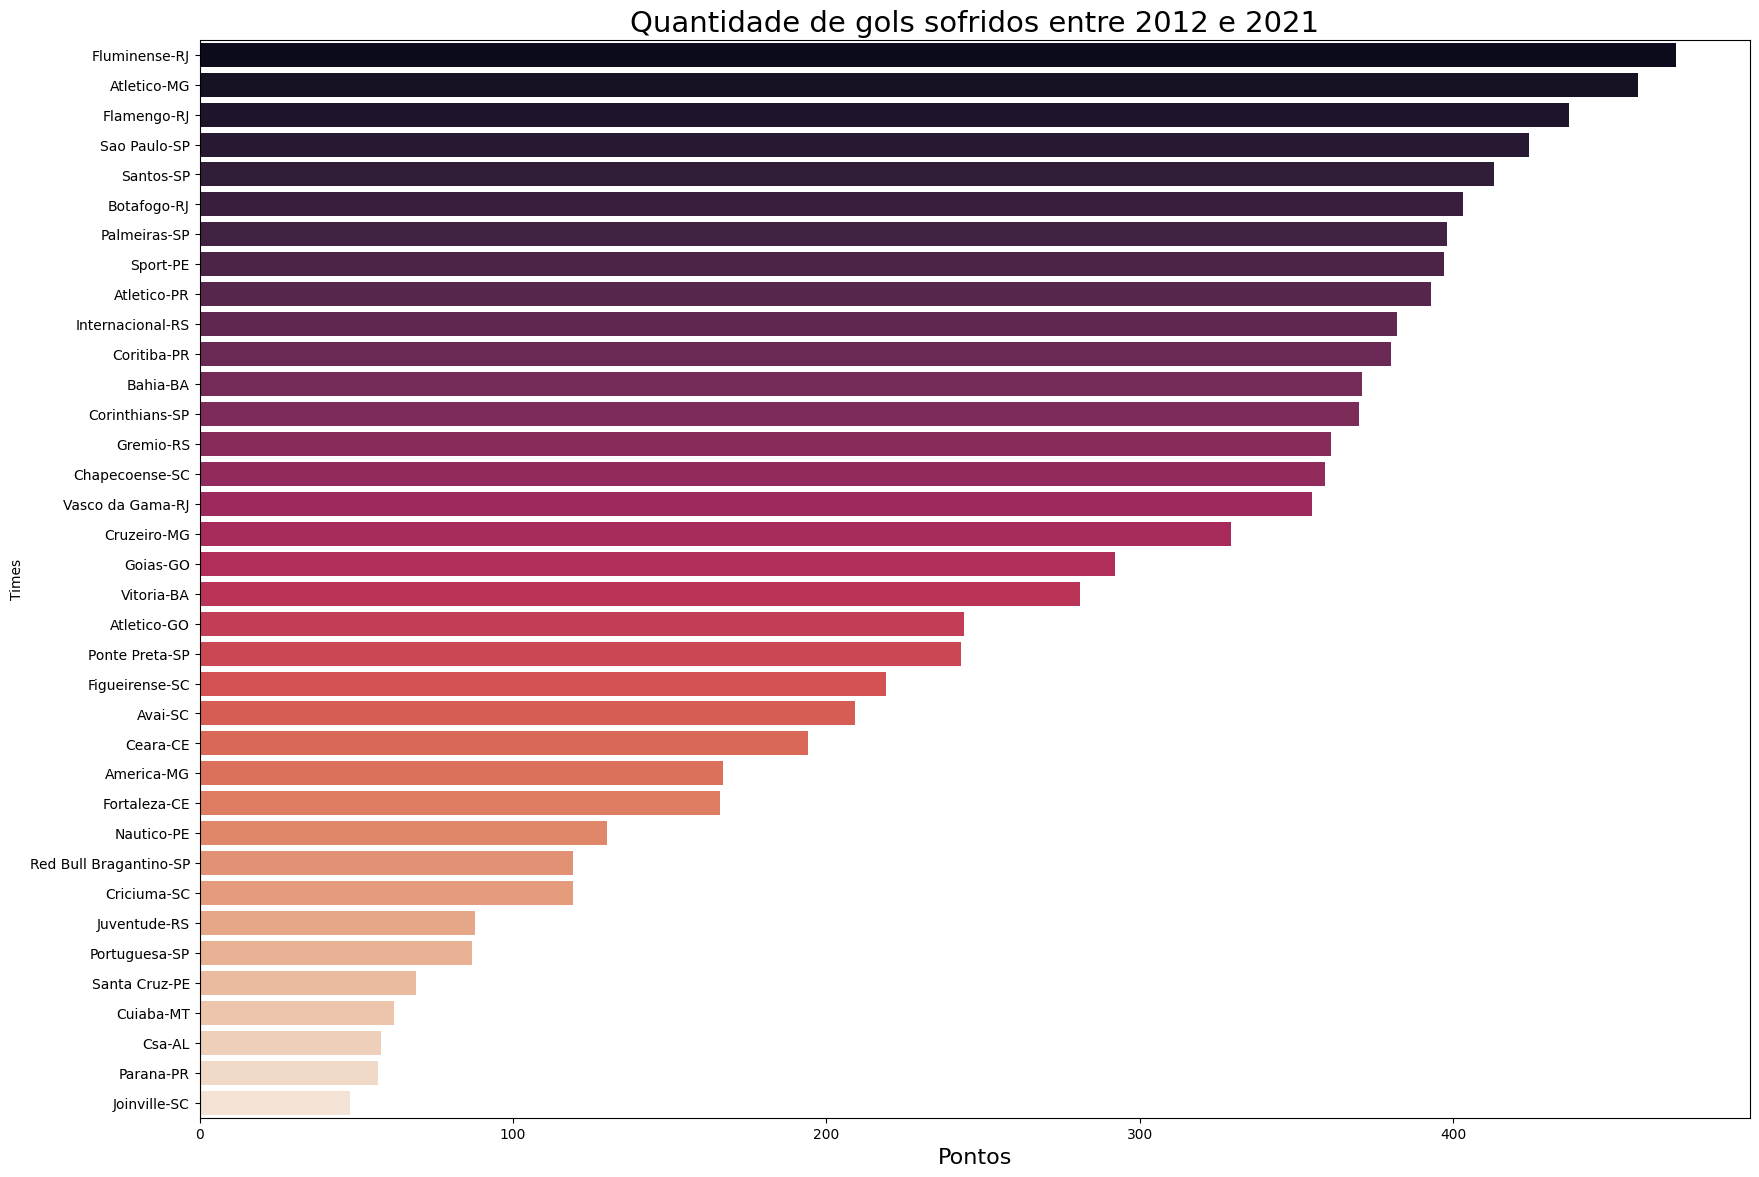

In [83]:
fig, ax = plt.subplots(figsize=(20, 14))
ax = sns.barplot(
    x=br_gols_sofridos.values, y=br_gols_sofridos.index,palette='rocket', legend=False
)

# Ajusta o título e os rótulos dos eixos
ax.set_title('Quantidade de gols sofridos entre 2012 e 2021', fontsize=21)
ax.set_xlabel('Pontos', fontsize=16)
ax.set_ylabel('Times')

# Mostra o gráfico
plt.show()

# Aproveitamento


In [84]:
br_aproveitamentos = brasileirao_times['aproveitamento_final_%'].sort_values(ascending=False)
br_aproveitamentos

Atletico-MG               55.56
Flamengo-RJ               55.50
Palmeiras-SP              54.53
Gremio-RS                 53.77
Corinthians-SP            52.22
Sao Paulo-SP              50.99
Internacional-RS          50.91
Santos-SP                 50.66
Cruzeiro-MG               50.44
Atletico-PR               49.00
Fluminense-RJ             47.78
Red Bull Bragantino-SP    46.41
Fortaleza-CE              43.33
Botafogo-RJ               41.82
Vasco da Gama-RJ          41.60
Goias-GO                  41.51
Portuguesa-SP             40.79
Ceara-CE                  40.45
Sport-PE                  40.13
Bahia-BA                  40.13
Ponte Preta-SP            40.00
Vitoria-BA                38.95
Coritiba-PR               38.24
Cuiaba-MT                 38.02
America-MG                37.38
Chapecoense-SC            36.10
Atletico-GO               35.77
Figueirense-SC            34.43
Criciuma-SC               34.21
Juventude-RS              33.33
Avai-SC                   30.95
Nautico-

C:\Users\Vinicius307\AppData\Local\Temp\ipykernel_3252\2217319385.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=br_aproveitamentos.values,y=br_aproveitamentos.index, palette='vlag')
C:\Users\Vinicius307\Downloads\Winpython64-3.11.5.0\WPy64-31150\python-3.11.5.amd64\Lib\site-packages\seaborn\_oldcore.py:1124: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vinicius307\Downloads\Winpython64-3.11.5.0\WPy64-31150\python-3.11.5.amd64\Lib\site-packages\seaborn\_oldcore.py:1124: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


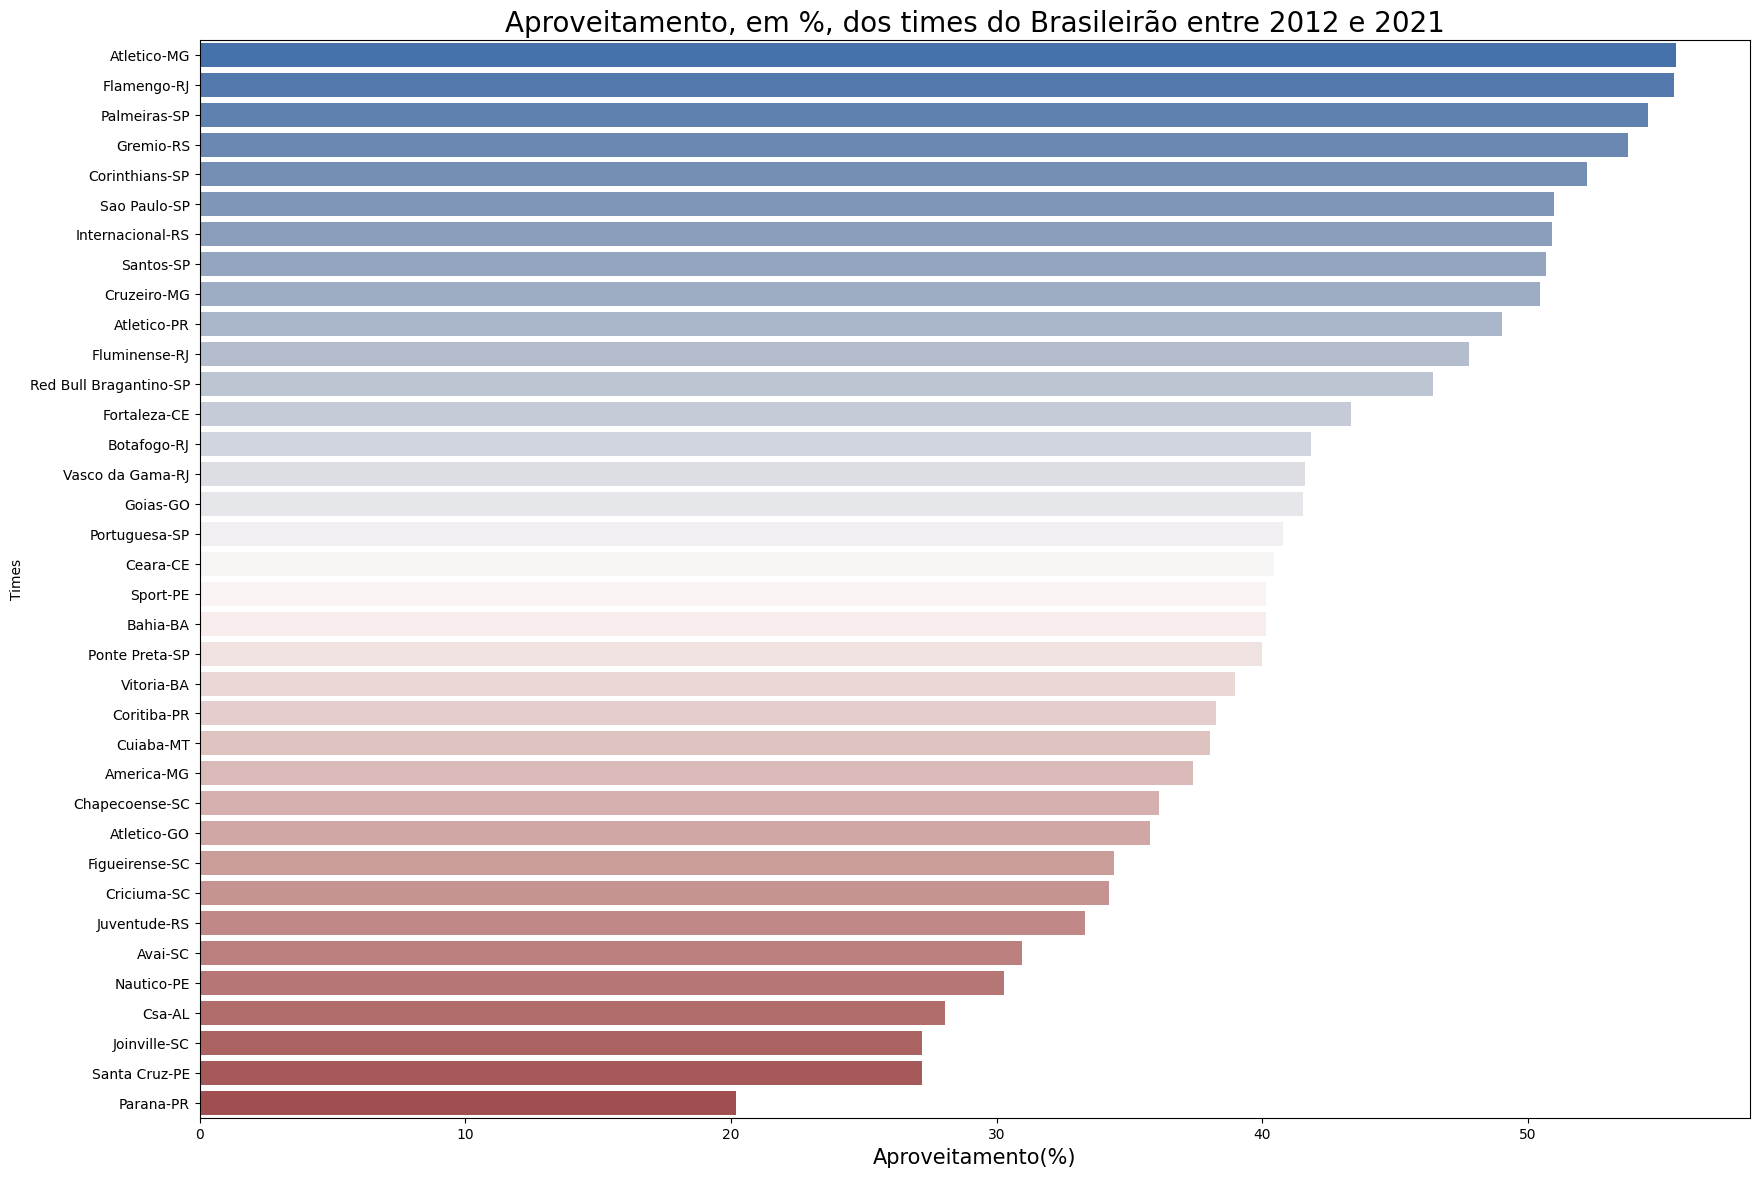

In [117]:
fig,ax = plt.subplots(figsize=(20,14))
ax = sns.barplot(x=br_aproveitamentos.values,y=br_aproveitamentos.index, palette='vlag')
ax.set_title('Aproveitamento, em %, dos times do Brasileirão entre 2012 e 2021', fontsize = 20)
ax.set_xlabel('Aproveitamento(%)', fontsize =15)
ax.set_ylabel('Times')
plt.savefig('C:/Users/Vinicius307/Downloads/Winpython64-3.11.5.0/WPy64-31150/.aproveitamento.png')
plt.show()



# Exportação de DataFrames criados


In [108]:
brasileirao_times['time'] = brasileirao_times.index
br_times = brasileirao_times.pop('time')
brasileirao_times.insert(0, 'time', br_times)
brasileirao_times = brasileirao_times.reset_index(drop=True)
brasileirao_times

,time,total_jogos,qtde_temporadas_disputadas,total_vitorias_fora,total_empates_fora,total_derrotas_fora,total_gols_marcados_fora,total_gols_sofridos_fora,total_gols_marcados,total_gols_sofridos,total_pontos,aproveitamento_final_%,total_vitorias_casa,total_empates_casa,total_derrotas_casa,total_gols_marcados_casa,total_gols_sofridos_casa
0,America-MG,140,4,9,18,43,43,108,116,167,157,37.38,31,19,20,73,59
1,Atletico-GO,178,5,21,23,45,78,142,171,244,191,35.77,25,30,34,93,102
2,Atletico-MG,405,10,60,66,76,234,271,608,459,675,55.56,130,39,34,374,188
3,Atletico-PR,368,10,47,42,96,169,248,449,393,541,49.00,105,43,35,280,145
4,Avai-SC,140,4,11,13,46,41,122,110,209,130,30.95,19,27,24,69,87
5,Bahia-BA,304,8,30,44,78,139,221,328,371,366,40.13,62,46,44,189,150
6,Botafogo-RJ,330,9,39,41,85,147,233,360,403,414,41.82,72,40,53,213,170
7,Ceara-CE,178,5,16,31,42,87,111,187,194,216,40.45,35,32,22,100,83
8,Chapecoense-SC,265,7,22,40,71,112,217,261,359,287,36.10,48,37,47,149,142
9,Corinthians-SP,406,10,57,60,86,191,223,487,370,636,52.22,113,66,24,296,147


In [115]:
brasileirao.to_csv('C:/Users/Vinicius307/Downloads/Winpython64-3.11.5.0/WPy64-31150/brasileirao2.csv', sep=';', encoding='utf-8', index=False)
brasileirao_times.to_csv('C:/Users/Vinicius307/Downloads/Winpython64-3.11.5.0/WPy64-31150/brasileirao2_times.csv', sep=';', encoding='utf-8', index=False)

# Resumo:
36 times disputaram o Brasileirão no período entre 2012 e 2021;
7 times estiveram presentes em todas as disputas nesse período;
6 times estiveram presentes em apenas 1 disputa durante esse período;
O percentual de vitórias jogando em casa é de 49.05%, dando a entender que o mando de campo influencia significativamente o resultado do jogo;
O time que mais pontuou foi o Atlético-MG (635) e o que menos pontuou foi o Paraná (23);
O time que mais marcou gols foi o Atlético-MG (574) e o que mais sofreu foi o Fluminense (441);
O time com o melhor aproveitamento foi o Atlético-MG (55.85%) e com o menor foi o Paraná (20.18%).(20.1818%).